In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [5]:
url_edad  = "https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto10/FallecidosEtario_T.csv"
data_edad = pd.read_csv(url_edad)
data_edad.tail(5)

,Grupo de edad,<=39,40-49,50-59,60-69,70-79,80-89,>=90
15,2020-04-24,5,4,14,30,49,56,16
16,2020-04-25,6,6,15,31,50,57,16
17,2020-04-26,6,7,15,33,52,59,17
18,2020-04-27,6,7,16,35,57,60,17
19,2020-04-28,6,8,16,35,60,62,20


## Cantidad de casos, según rango etario, a lo largo de los días

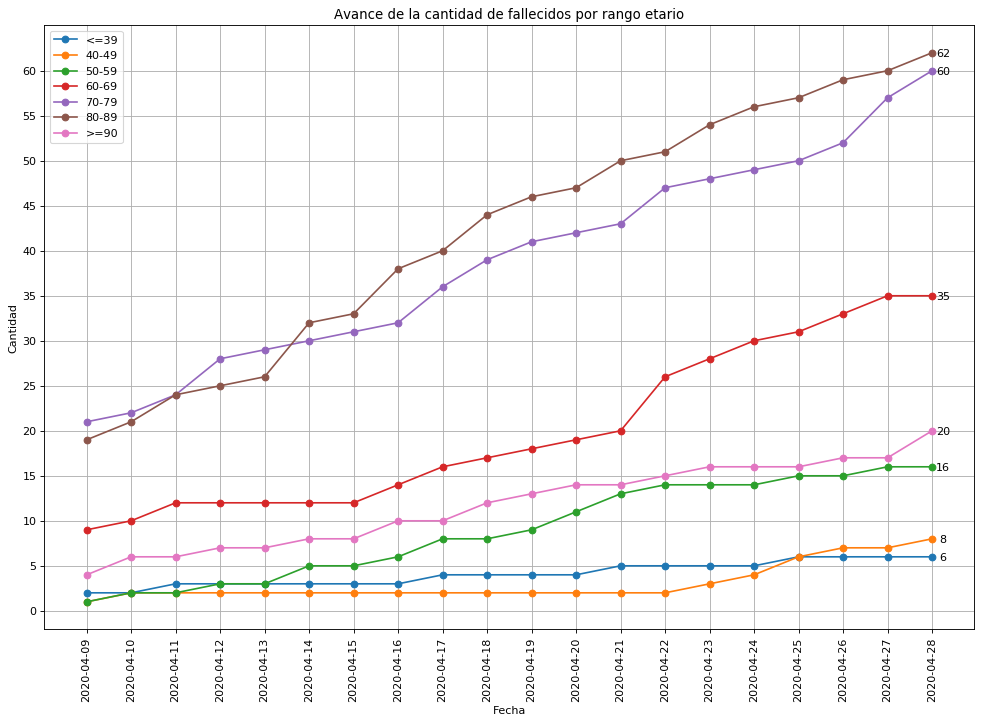

In [6]:
def labelonbars(X, Y):
    n = len(X)
    for i in range (n):
        number = '{:,}'.format(int(Y[i])).replace(',', '.')
        plt.annotate(
            number, xy=(X[i], Y[i]),
            xytext =(10, -5),
            textcoords="offset points",
            ha ='center', va='bottom')

plt.figure(figsize=(15, 10), dpi=80)
plt.subplot(1, 1, 1)
plt.plot(data_edad["Grupo de edad"], data_edad["<=39"],  "o-")
plt.plot(data_edad["Grupo de edad"], data_edad["40-49"], "o-")
plt.plot(data_edad["Grupo de edad"], data_edad["50-59"], "o-")
plt.plot(data_edad["Grupo de edad"], data_edad["60-69"], "o-")
plt.plot(data_edad["Grupo de edad"], data_edad["70-79"], "o-")
plt.plot(data_edad["Grupo de edad"], data_edad["80-89"], "o-")
plt.plot(data_edad["Grupo de edad"], data_edad[">=90"],  "o-")
plt.xticks(data_edad["Grupo de edad"], rotation='vertical')
plt.legend(data_edad.columns[1:])
plt.title("Avance de la cantidad de fallecidos por rango etario")
plt.xlabel("Fecha")
plt.ylabel("Cantidad")
plt.yticks(np.arange(0, max(data_edad["80-89"]), 5))
plt.grid()
### ----- DATO ULTIMO DIA ----- ###
last_x_ticks = data_edad["Grupo de edad"].tail(1).tolist()
last_39_tick = data_edad["<=39"].tail(1).tolist()
last_40_tick = data_edad["40-49"].tail(1).tolist()
last_50_tick = data_edad["50-59"].tail(1).tolist()
last_60_tick = data_edad["60-69"].tail(1).tolist()
last_70_tick = data_edad["70-79"].tail(1).tolist()
last_80_tick = data_edad["80-89"].tail(1).tolist()
last_90_tick = data_edad[">=90"].tail(1).tolist()
labelonbars(last_x_ticks, last_39_tick)
labelonbars(last_x_ticks, last_40_tick)
labelonbars(last_x_ticks, last_50_tick)
labelonbars(last_x_ticks, last_60_tick)
labelonbars(last_x_ticks, last_70_tick)
labelonbars(last_x_ticks, last_80_tick)
labelonbars(last_x_ticks, last_90_tick)
### ----- DATO ULTIMO DIA ----- ###
plt.show()

## Cantidadad total de cada rango etario

In [7]:
def labelonbars(X, Y):
    n = len(X)
    for i in range (n):
        number = '{:,}'.format(int(Y[i])).replace(',', '.')
        plt.annotate(
            number, xy=(X[i], Y[i]),
            xytext =(0, 1),
            textcoords="offset points",
            ha ='center', va='bottom')

In [8]:
total_menos39   = data_edad["<=39"].tail(1).values[0]
total_40_49     = data_edad["40-49"].tail(1).values[0]
total_50_59     = data_edad["50-59"].tail(1).values[0]
total_60_69     = data_edad["60-69"].tail(1).values[0]
total_70_79     = data_edad["70-79"].tail(1).values[0]
total_80_89     = data_edad["80-89"].tail(1).values[0]
total_mayor90   = data_edad[">=90"].tail(1).values[0]

Y               = [total_menos39, total_40_49, total_50_59, total_60_69, total_70_79, total_80_89, total_mayor90]
X               = ["<=39", "40-49", "50-59", "60-69", "70-79", "80-89", ">=90"]

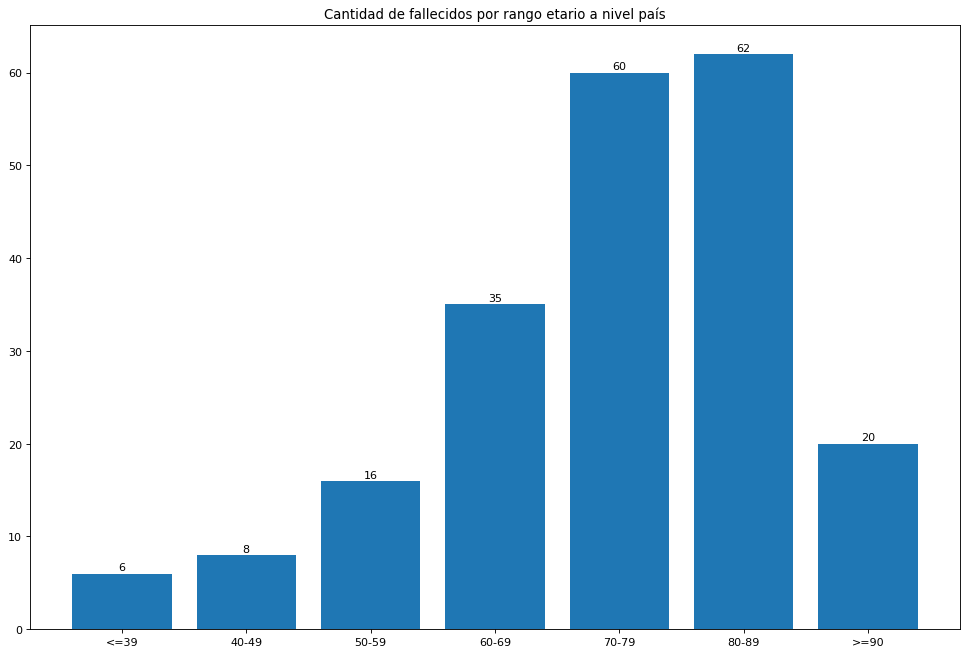

In [9]:
plt.figure(figsize=(15, 10), dpi=80)
plt.bar(X, Y)
plt.title("Cantidad de fallecidos por rango etario a nivel país")
labelonbars(X, Y)
plt.show()

## Porcentaje de fallecidos para cada rango etario

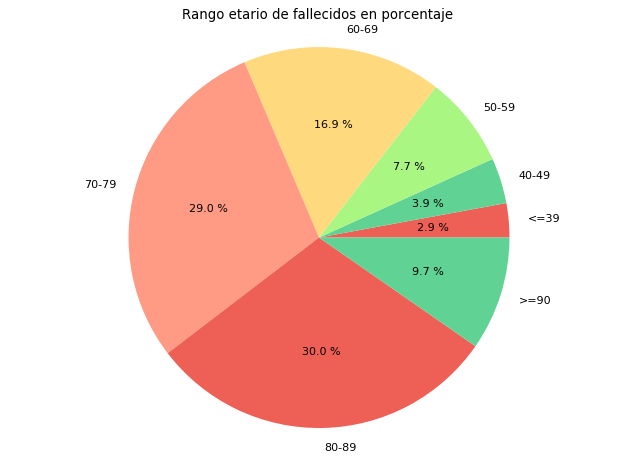

In [10]:
plt.figure(figsize=(10, 7), dpi=80)
colores = ["#EE6055","#60D394","#AAF683","#FFD97D","#FF9B85"]
plt.pie(Y, labels=X, autopct="%0.1f %%", colors=colores)
plt.title("Rango etario de fallecidos en porcentaje")
plt.axis("equal")
plt.show()